## Football fouls

In [8]:
from fastai.vision.all import *
from utils import *

In [13]:
path = Path.cwd()/'datasets/football'

if not path.exists(): path.mkdir()

In [14]:
key = ""

In [22]:
results = search_images_bing(key, 'football fouls')
ims = results.attrgot('contentUrl')
len(ims)

150

In [28]:
dest = path/'show.jpg'
download_url(ims[0], dest)

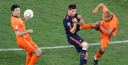

In [29]:
im = Image.open(dest)
im.to_thumb(128, 128)

In [30]:
download_images(path, urls=ims)

In [54]:
fns = get_image_files(path)

In [55]:
fns[2]

Path('/home/fastai-2020-lalkrishna/My-files/datasets/football/00000016.jpg')

In [56]:
failed = verify_images(fns)
failed

(#0) []

In [57]:
failed.map(Path.unlink)

(#0) []

### Loading data

In [61]:
fouls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=.3, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [62]:
dls = fouls.dataloaders(path)

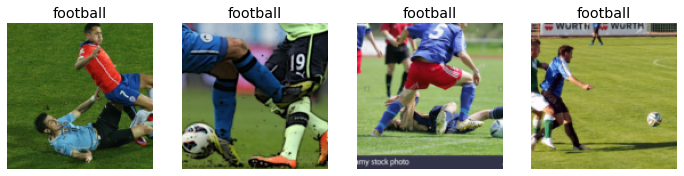

In [63]:
dls.valid.show_batch(max_n=4, nrows=1)